In [1]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [2]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [3]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)



Enter radius: 150
Enter origin: 20,20
How many circle: 180


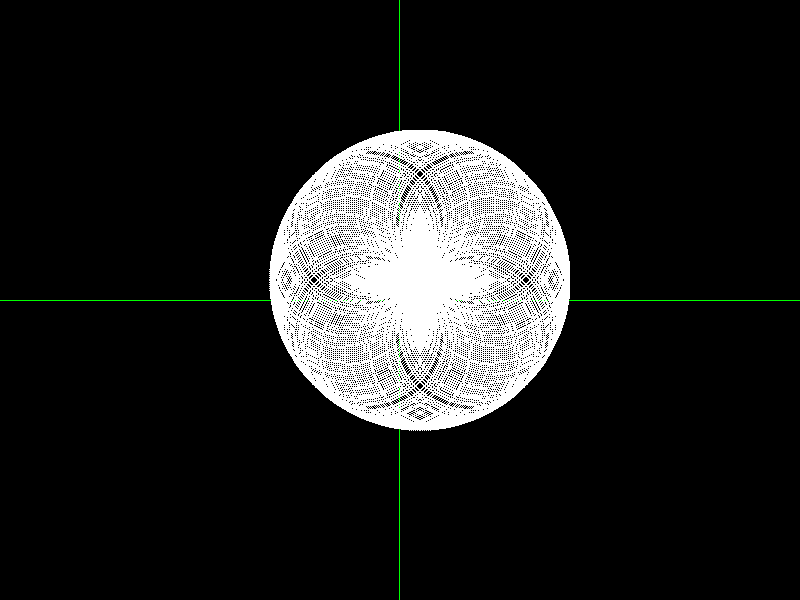

In [4]:
from IPython.display import display
from PIL import Image

#from typing_extensions import ParamSpecKwargs
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
import math
# Let's render something!
def ownVertex(x,y):
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x,y,z)
def drawAxis():
  gl.glColor3f(0, 255, 0)
  gl.glPointSize(5)
  gl.glBegin(gl.GL_LINES)
  ownVertex(0,HEIGHT/2)
  ownVertex(0,-HEIGHT/2)
  ownVertex(WIDTH/2,0)
  ownVertex(-WIDTH/2,0)
  gl.glEnd()

gl.glClear(gl.GL_COLOR_BUFFER_BIT)
def pointDraw(cordinates_list):
  gl.glColor3f(255, 255, 255)
  gl.glPointSize(2)
  gl.glBegin(gl.GL_LINES)
  for item in cordinates_list:
    ordinate,abscissa = item
    ownVertex(ordinate,abscissa)
  gl.glEnd()

def CircAtorigin(radius):
  d = 1-radius
  x = 0
  y = radius
  cordinates = []
  while x<=y:
    cordinates.append((x,y))
    if d>=0: #SE
      d += 2 * x - 2*y + 5
      x += 1
      y -= 1
    elif d<0:
      d += 2 * x + 5
      x += 1
  return cordinates


def InZone(cordinates,zone):
  new_cordinates = []
  if zone == 0:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,x))
  elif zone == 1:
    return cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,y))
    return new_cordinates
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,x))
    return new_cordinates
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-y,-x))
    return new_cordinates
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_cordinates.append((-x,-y))
    return new_cordinates
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_cordinates.append((x,-y))
    return new_cordinates
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_cordinates.append((y,-x))
  return new_cordinates


def DrawAllZone(cordinates,h,k):
  for zone in range(8):
    toPrint=[]
    zone_points = InZone(cordinates,zone)
    pointDraw(changeOrigin(h,k,zone_points))
def changeOrigin(h,k,points):
  newPoints = []
  for point in points:
    x,y = point 
    x+= h
    y+=k
    newPoints.append((x,y))
  return newPoints




drawAxis()
radius = int(input("Enter radius: "))
origin = input("Enter origin: ")
num = int(input("How many circle: "))
degree = 360 // num
origin = origin.split(",")
h = int(origin[0])
k = int(origin[1])
zone1_points=CircAtorigin(radius)
DrawAllZone(zone1_points,h,k)
x_draw = radius/2
x_n_draw = - x_draw
zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h+x_draw,k)

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h+x_n_draw,k)

y_draw = radius/2
y_n_draw = - y_draw

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h,y_draw+k)

zone1_points=CircAtorigin(radius/2)
DrawAllZone(zone1_points,h,y_n_draw+k)



# zone1_points=CircAtorigin(radius/2)
# DrawAllZone(zone1_points,x_n_draw,y_n_draw)
# radius1 = radius 
#Corner Circle origin calculator 
#radius =radius ** 0.5
# y1 = ((((radius))**2 - (radius - h)**2)** 0.5)-k
# print(y1)
# common_point  = (radius,y1)
# Mid_point = ((h+radius)/2,(k+y1)/2)
# print(Mid_point)
# c_x,c_y = Mid_point
for deg in range(degree,361,degree):
  costheta = math.cos(deg)
  sintheda = math.sin(deg)
  c_x,c_y = ((radius) * costheta)/2,((radius) * sintheda)/2

  zone1_points=CircAtorigin(radius/2)
  DrawAllZone(zone1_points,(h+c_x),k+c_y)

  zone1_points=CircAtorigin(radius/2)
  DrawAllZone(zone1_points,(-c_x+h),(k+c_y))

  zone1_points=CircAtorigin(radius/2)
  DrawAllZone(zone1_points,h+c_x,(-c_y+k))

  zone1_points=CircAtorigin(radius/2)
  DrawAllZone(zone1_points,-c_x+h,-c_y+k)



# 0



# img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
# img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
# show.image(img/255.0)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))